# Task (1): Complete the following table with updated data:

### Objective 1: Determine the number of true positives, false negatives, and false positives per group in the data set.

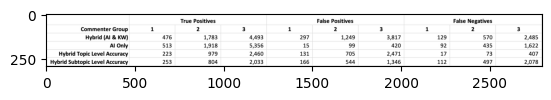

In [27]:
from PIL import Image
from matplotlib import pyplot as plt

image_path = '/Users/developer/Desktop/Coding/Work/InsightsAI/Improved Model/images/obj1.jpeg'
image = Image.open(image_path)
plt.imshow(image)

The most relevant dataset would be statistics_basic_filter_groups.json. This dataset contains the following information:

* number of tp, fp, fn for hybrid method by topic and group

Step 1: Load the dataset and create 5 columns: Topic, Group, TP, FP, FN. 

In [28]:
import pandas as pd

# Load the JSON file
data = pd.read_json('/Users/developer/Desktop/Coding/Work/InsightsAI/Improved Model/json/statistics_basic_filter_groups.json')

# Create empty lists to store the extracted data
topics = []
groups = []
true_positives = []
false_positives = []
false_negatives = []

# Iterate over the data dictionary and extract the values
for topic, groups_dict in data.items():
    for group, values in groups_dict.items():
        topics.append(topic)
        groups.append(group)
        true_positives.append(values['tp'])
        false_positives.append(values['fp'])
        false_negatives.append(values['fn'])

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    'Topic': topics,
    'Group': groups,
    'True Positive': true_positives,
    'False Positive': false_positives,
    'False Negative': false_negatives
})

# Print the resulting DataFrame

print(df.head())

                            Topic Group  True Positive  False Positive   
0    7_REGULATORY_IMPACT_ANALYSIS    g1             21               4  \
1    7_REGULATORY_IMPACT_ANALYSIS    g2            104              31   
2    7_REGULATORY_IMPACT_ANALYSIS    g3            447             202   
3  2E_VALUATION_OF_SPECIFIC_CODES    g1             33               1   
4  2E_VALUATION_OF_SPECIFIC_CODES    g2            118              15   

   False Negative  
0               1  
1               6  
2             121  
3               1  
4              16  


Step 2: Count the number of true positives for each group

In [29]:
total_true_positive = df.groupby('Group')['True Positive'].sum()
print(total_true_positive)

Group
g1     243
g2    1110
g3    3648
Name: True Positive, dtype: int64


Step 3: Count the number of false positives for each group

In [30]:
total_false_positive = df.groupby('Group')['False Positive'].sum()
print(total_false_positive)

Group
g1      83
g2     354
g3    1093
Name: False Positive, dtype: int64


Step 4: Count the number of false negatives for each group

In [31]:
total_false_negative = df.groupby('Group')['False Negative'].sum()
print(total_false_negative)

Group
g1     46
g2    170
g3    869
Name: False Negative, dtype: int64


Initialize and populate a new dataframe called summary_df that contains the values from steps 2, 3, and 4.

In [33]:
summary_df = pd.DataFrame({
    'True Positive': total_true_positive,
    'False Positive': total_false_positive,
    'False Negative': total_false_negative
})

print(summary_df)

       True Positive  False Positive  False Negative
Group                                               
g1               243              83              46
g2              1110             354             170
g3              3648            1093             869


### Objective 2: Determine Hybrid Topic Level Accuracy